In [8]:
from dash import Dash, html, dcc, callback, Output, Input, dash_table
import dash_bootstrap_components as dbc
import plotly.express as px
import pandas as pd 
import matplotlib.pyplot as plt
from math import pi

In [11]:
df = pd.read_excel("jugadores.xlsx")

df["porcentaje_rebotes"] = df["Rebotes Ofensivos"]/df["Nº Partidos jugados"]
df["porcentaje_faltas"]  = df["Faltas Personales Cometidas"]/df["Nº Partidos jugados"]
df["porcentaje_tapones"] = df["Tapones Cometidos"]/df["Nº Partidos jugados"]

In [12]:
ds.head()

,Nombre,Nº Partidos jugados,Minutos Jugados,Puntos Totales,TCP2 anotados,TCP2 Intentados,TCP2 (%),TCP3 anotados,TCP3 Intentados,TCP3 (%),...,Asistencias,Recuperaciones,Pérdidas,Tapones Cometidos,Tapones Recibidos,Faltas Personales Cometidas,Faltas Personales Recibidas,porcentaje_rebotes,porcentaje_faltas,porcentaje_tapones
0,Juan Pérez,6,138,45,15,28,0.535714,0,3,0.000000,...,7,1,13,4,1,16,13,1.833333,2.666667,0.666667
1,Carlos López,9,125,57,19,37,0.513514,5,14,0.357143,...,3,1,15,2,1,14,18,0.444444,1.555556,0.222222
2,Miguel Rodríguez,15,217,66,14,30,0.466667,12,45,0.266667,...,10,6,15,1,0,11,9,0.333333,0.733333,0.066667
3,David Hernández,24,274,55,15,40,0.375000,5,29,0.172414,...,12,7,18,0,3,27,13,0.333333,1.125000,0.000000
4,José Martínez,2,7,2,1,2,0.500000,0,0,0.000000,...,0,1,0,0,1,0,0,0.000000,0.000000,0.000000


In [13]:
def radarChart(player_name):

    # Filtrar el dataframe por el nombre del jugador
    player_data = ds[ds['Nombre'] == player_name]

    if player_data.empty:
        print(f"No se encontró al jugador {player_name} en el dataset.")
        return

    # Columnas que usaremos para el radar
    categories = ['TCP2 (%)', 'TCP3 (%)', 'TCP1 (%)', 'porcentaje_rebotes', 'porcentaje_faltas', 'porcentaje_tapones']
    
    # Obtener los valores del jugador en esas categorías
    values = player_data[categories].values.flatten().tolist()

    # Cerrar el gráfico anterior si lo hay
    plt.clf()

    # Preparar los ángulos del radar
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Cerrar el círculo

    values += values[:1]  # Cerrar el gráfico

    # Inicializar el gráfico
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Dibujar el gráfico de radar
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)

    # Ajustes de las categorías y etiquetas
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Añadir título
    plt.title(f'Estadísticas de {player_name}', size=15, color='blue', y=1.1)
    
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\aigut\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 640x480 with 0 Axes>

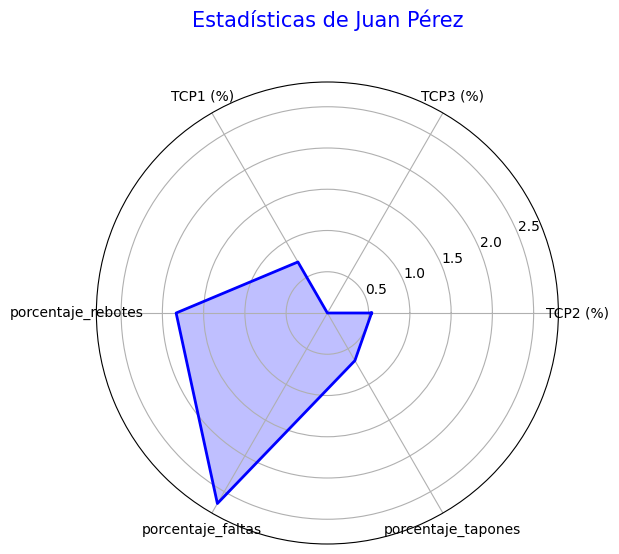

In [14]:
radarChart(player_name = 'Juan Pérez')

Grafico 1 (Evaluacion de desempeño del jugador en la temporada):
Para esto lo que vamos hacer es un grafico de barras en al que vamos ha mostrar los mejores jugadores de la liga, en funcion del Player Efficiency Rating (PER). Estadística avanzada de baloncesto desarrollada por John Hollinger que mide la eficiencia y productividad de un jugador en base a su rendimiento en cancha. Esta métrica intenta resumir todos los aportes estadísticos de un jugador en un solo número.

Debido a los datos de los que disponemos lo que haremos sera una version simplificada de este calculo ya que no disponemos de datos de los equipos, ya solo temos informacion de los equipos.

Interpretación del PER
* 15: Es el promedio de la liga.
* 20 o más: Se considera un jugador de alto rendimiento.
* 25 o más: Un jugador con un rendimiento excepcional.
* 30 o más: Niveles de rendimiento de los mejores jugadores históricos.

In [17]:
df['PER Aproximado'] = (
    (df["Puntos Totales"] + df["Rebotes Totales"] + df["Asistencias"] + df["Recuperaciones"]) -
    ((df["Tiros de campo Intentados"] - df["Tiros de campo Anotados"]) +
     (df["Tiros libres Intentados"] - df["Tiros Libres Anotados"]) +
     df["Pérdidas"])
) / df["Minutos Jugados"]

In [18]:
# Graficamos el PER aproximado
fig = px.bar(df, x='Nombre', y='PER Aproximado', title="PER Aproximado de los Jugadores de Baloncesto",
             labels={'PER Aproximado': 'PER Aproximado', 'Nombre': 'Jugador'},
             color='PER Aproximado', color_continuous_scale='Blues')

# Mostramos el gráfico
fig.show()